## Loading the data

In [36]:
import pandas as pd

In [53]:
df = pd.read_csv('appraisal.csv',on_bad_lines = "skip")

In [56]:
def make_float(x):
    if x == "":
        return np.nan
    else:
        return float(x)
    
#df["purchase_price"] = df.purchase_price.apply(lambda x: make_float(x)) 

In [57]:
df

,id,brand,model,version,year,km,sell_price,purchase_price
0,24,YAMAHA,X-MAX,250,2018.0,40000.0,4990.0,NaN
1,27,HONDA,LEAD,110,2017.0,12000.0,2000.0,NaN
2,31,SUZUKI,GSX,1250 FA,2017.0,19100.0,7590.0,NaN
3,37,YAMAHA,YZF,R1,2005.0,50000.0,4690.0,NaN
4,39,DUCATI,HYPERMOTARD,939,2021.0,9000.0,12490.0,NaN
...,...,...,...,...,...,...,...,...
10158,55591,PIAGGIO,X EVO,125,2011.0,20000.0,1790.0,NaN
10159,55613,YAMAHA,X-MAX,125,2018.0,20000.0,3990.0,NaN
10160,55618,Yamaha,Dark star,Xvs650 a,2004.0,40000.0,3390.0,NaN
10161,55619,KAWASAKI,VULCAN,EN 500,1991.0,30000.0,1790.0,NaN


In [58]:
df.dtypes

id                  int64
brand              object
model              object
version            object
year              float64
km                float64
sell_price        float64
purchase_price    float64
dtype: object

In [60]:
import sklearn
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

In [315]:
df_filtered = df.loc[(df.km.isna() == False).values,:].copy()

In [316]:
df_filtered = df_filtered.loc[df_filtered.sell_price != 0,:]
df_filtered = df_filtered.loc[df_filtered.sell_price < 750000,:]

In [317]:
df_filtered["brand"] = df_filtered["brand"].str.upper().astype("category")

In [318]:
df_filtered["model"] = df_filtered["model"].str.upper().astype("category")

In [319]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df_filtered["brand"])
df_filtered["brand"] = le.transform(df_filtered["brand"])


In [320]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df_filtered["model"])
df_filtered["model"] = le.transform(df_filtered["model"])


In [321]:
X_train, X_test, y_train, y_test = train_test_split(df_filtered[["year", "km", "brand", "model"]],
                                                   df_filtered["sell_price"])


In [322]:
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(random_state = 2, max_depth = 10)
reg.fit(X_train, y_train.values)

GradientBoostingRegressor(max_depth=10, random_state=2)

In [323]:
preds = reg.predict(X_train)

In [324]:
preds

array([1191.32428067, 3500.61028233, 5286.57072948, ..., 2461.82642639,
       3016.85896142, 2637.85576125])

In [325]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, preds)

871813.1069237144

In [326]:
X_train2 = X_train.copy()
X_train2["preds"] = preds
X_train2["true"] = y_train
X_train2

,year,km,brand,model,preds,true
7151,2010.0,40000.0,42,34,1191.324281,1090.0
1978,2008.0,50000.0,36,610,3500.610282,3790.0
5992,2021.0,4003.0,87,581,5286.570729,5290.0
9321,2004.0,80000.0,74,45,1848.608470,1990.0
8752,2020.0,10000.0,3,192,4446.656038,4490.0
...,...,...,...,...,...,...
6483,2016.0,10778.0,87,606,1962.239638,1690.0
6594,2020.0,10000.0,47,382,2146.567971,2190.0
2181,2019.0,10000.0,10,595,2461.826426,2690.0
3153,2009.0,40000.0,36,158,3016.858961,2990.0


In [327]:
preds = reg.predict(X_test)
mean_squared_error(y_test, preds)

3651036.35810861

In [328]:
X_test2 = X_test.copy()
X_test2["preds"] = preds
X_test2["true"] = y_test
X_test2

,year,km,brand,model,preds,true
6486,2005.0,50000.0,87,63,3320.596432,3490.0
8409,2015.0,10000.0,10,125,1498.645141,1290.0
8901,2006.0,40000.0,87,603,5579.875446,3190.0
3028,2015.0,10000.0,14,403,6121.209837,5790.0
9978,2022.0,10000.0,48,284,3022.670335,2490.0
...,...,...,...,...,...,...
7487,2014.0,20000.0,87,581,3846.556090,2890.0
1842,2013.0,40000.0,87,486,6754.977346,6990.0
1351,2006.0,60000.0,74,217,3924.711434,2290.0
992,2009.0,20000.0,74,45,3261.805861,3790.0


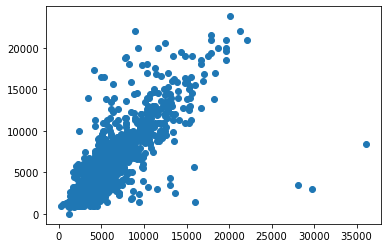

In [329]:
from matplotlib import pyplot as plt
#X_test2 = X_test2.loc[X_test2.preds < 350000,:]
plt.scatter(X_test2.preds, X_test2.true)

### Training with cv

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_filtered[["year", "km", "brand", "model"]],
                                                   df_filtered["sell_price"])



In [332]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [333]:
X_df_filtered = df_filtered[["brand", "model", "year", "km"]]
y_df_filtered = df_filtered[["sell_price"]]

In [336]:
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [338]:
reg = GradientBoostingRegressor(random_state = 2, max_depth = 10)
cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=3, random_state=1)
#n_scores = root_
n_scores = cross_val_score(reg, X_df_filtered, 
                           y_df_filtered, 
                           scoring='neg_mean_squared_error', cv=cv, 
                           n_jobs=-1, error_score='raise')


/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.


In [ ]:
reg = GradientBoostingRegressor(random_state = 2, 
                                max_depth = 10,
                               n_estimators = 100)
cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=3, random_state=1)
#n_scores = root_
n_scores = cross_val_score(reg, X_df_filtered, 
                           y_df_filtered, 
                           scoring='neg_mean_squared_error', cv=cv, 
                           n_jobs=-1, error_score='raise')


In [345]:
n_scores.reshape(3, 4).mean(axis = 0) # neg mse for each fold


array([-3295744.82049327, -3958620.08636599, -3615491.17032625,
       -4491127.11993528])


### With hyperopt

In [409]:
# next we continue to define a search space with hyperopt to 
# define the optimal parameters
from hyperopt import hp
from hyperopt import fmin, tpe, space_eval
from hyperopt import  Trials
from hyperopt.pyll import scope

space = hp.choice('a',
    [('MSE loss', 
        hp.uniform('max_depth', 0, 100), # 
        hp.uniform('learning_rate', 0.001, 0.5),
        scope.int(hp.uniform('n_estimators', 50, 150))#, 
        #hp.quiniform('my_param', 50, 150, q=1),
        #hp.uniform("validation_fraction", 0.05, 0.2)
     )
    ])
 

In [410]:
# definition of objective function

def objective(args):
    (label, 
     max_depth,
     learning_rate,
    n_estimators, 
    #validation_fraction
    ) = args
    
    reg = GradientBoostingRegressor(random_state = 2, 
                                max_depth = max_depth,
                               n_estimators = n_estimators,
                                   learning_rate = learning_rate,
                                   #validation_fraction = validation_fraction
                                   )
    cv = RepeatedStratifiedKFold(n_splits=4,
                                 n_repeats=2,
                                 random_state=2)
    
    n_scores = cross_val_score(reg, X_df_filtered, 
                           y_df_filtered, 
                           scoring='neg_mean_squared_error',
                               cv=cv, 
                           n_jobs=-1,
                               error_score='raise')
    
    final_rmse = abs(np.mean(n_scores)) # abs of negative rmse
    return final_rmse

    
    

In [411]:
max_evals = 75
trials = Trials()
best = fmin(objective, 
            space, algo=tpe.suggest, 
            max_evals=max_evals,
           trials = trials)


  0%|                                    | 0/75 [00:00<?, ?trial/s, best loss=?]

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.



  1%|▏          | 1/75 [00:05<07:10,  5.81s/trial, best loss: 5431384.426864851]

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.



  3%|▎          | 2/75 [00:06<03:45,  3.08s/trial, best loss: 4659512.896096387]

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.



  4%|▍          | 3/75 [00:09<03:16,  2.73s/trial, best loss: 4659512.896096387]

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.



  5%|▌          | 4/75 [00:14<04:23,  3.71s/trial, best loss: 4659512.896096387]

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.



  7%|▋          | 5/75 [00:17<04:01,  3.46s/trial, best loss: 4659512.896096387]

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.



  8%|▊         | 6/75 [00:18<03:01,  2.63s/trial, best loss: 4140203.2935494427]

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.



  9%|▉         | 7/75 [00:29<06:10,  5.45s/trial, best loss: 4140203.2935494427]

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.



 11%|█         | 8/75 [00:32<05:16,  4.72s/trial, best loss: 4140203.2935494427]

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.



 12%|█▏        | 9/75 [00:33<03:46,  3.44s/trial, best loss: 4140203.2935494427]

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.



 13%|█▏       | 10/75 [00:37<03:57,  3.66s/trial, best loss: 4140203.2935494427]

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.



 15%|█▎       | 11/75 [00:41<03:57,  3.70s/trial, best loss: 4140203.2935494427]

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.



 16%|█▍       | 12/75 [00:48<04:50,  4.61s/trial, best loss: 4140203.2935494427]

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.



 17%|█▌       | 13/75 [00:52<04:38,  4.50s/trial, best loss: 4140203.2935494427]

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.



 19%|█▋       | 14/75 [00:59<05:24,  5.33s/trial, best loss: 4140203.2935494427]

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.

/home/revilo/.local/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/revilo/.local/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/revilo/.local/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A 

 20%|█▊       | 15/75 [01:00<04:06,  4.11s/trial, best loss: 3998891.6026719026]

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.



 23%|██       | 17/75 [01:02<02:19,  2.41s/trial, best loss: 3998891.6026719026]

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.



 24%|██▏      | 18/75 [01:08<03:08,  3.31s/trial, best loss: 3998891.6026719026]

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.



 25%|██▎      | 19/75 [01:14<03:47,  4.06s/trial, best loss: 3998891.6026719026]

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.



 27%|██▍      | 20/75 [01:19<04:13,  4.62s/trial, best loss: 3998891.6026719026]

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.



 28%|██▌      | 21/75 [01:28<05:19,  5.92s/trial, best loss: 3998891.6026719026]

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.



 29%|██▋      | 22/75 [01:36<05:37,  6.37s/trial, best loss: 3998891.6026719026]

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.



 31%|██▊      | 23/75 [01:39<04:34,  5.28s/trial, best loss: 3998891.6026719026]

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.



 32%|██▉      | 24/75 [01:51<06:25,  7.56s/trial, best loss: 3998891.6026719026]

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.



 33%|███      | 25/75 [01:55<05:24,  6.49s/trial, best loss: 3998891.6026719026]

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.



 35%|███      | 26/75 [02:03<05:37,  6.88s/trial, best loss: 3998891.6026719026]

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.



 36%|███▏     | 27/75 [02:17<07:06,  8.89s/trial, best loss: 3998891.6026719026]

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.



 37%|███▎     | 28/75 [02:20<05:32,  7.08s/trial, best loss: 3998891.6026719026]

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.



 39%|███▍     | 29/75 [02:25<04:59,  6.51s/trial, best loss: 3998891.6026719026]

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.

/home/revilo/.local/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/revilo/.local/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/revilo/.local/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A 

 40%|███▌     | 30/75 [02:30<04:36,  6.14s/trial, best loss: 3998891.6026719026]

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.



 41%|████▏     | 31/75 [02:33<03:48,  5.18s/trial, best loss: 3932214.554925048]

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.



 43%|████▎     | 32/75 [02:39<03:56,  5.50s/trial, best loss: 3932214.554925048]

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.



 44%|████▍     | 33/75 [02:51<05:11,  7.42s/trial, best loss: 3932214.554925048]

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.



 47%|████▋     | 35/75 [03:04<04:10,  6.27s/trial, best loss: 3932214.554925048]

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.



 48%|████▊     | 36/75 [03:14<04:51,  7.47s/trial, best loss: 3932214.554925048]

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.



 49%|████▍    | 37/75 [03:16<03:38,  5.75s/trial, best loss: 3648339.9527624836]

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.



 51%|████▌    | 38/75 [03:21<03:29,  5.67s/trial, best loss: 3648339.9527624836]

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.



 52%|████▋    | 39/75 [03:22<02:36,  4.36s/trial, best loss: 3648339.9527624836]

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.



 53%|████▊    | 40/75 [03:25<02:16,  3.89s/trial, best loss: 3648339.9527624836]

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.



 55%|████▉    | 41/75 [03:28<02:02,  3.60s/trial, best loss: 3648339.9527624836]

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.



 56%|█████    | 42/75 [03:32<02:04,  3.78s/trial, best loss: 3648339.9527624836]

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.



 57%|█████▏   | 43/75 [03:35<01:50,  3.46s/trial, best loss: 3648339.9527624836]

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.



 59%|█████▎   | 44/75 [03:40<01:56,  3.74s/trial, best loss: 3648339.9527624836]

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.

/home/revilo/.local/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/revilo/.local/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/revilo/.local/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A 

 60%|█████▍   | 45/75 [03:41<01:29,  3.00s/trial, best loss: 3648339.9527624836]

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.



 61%|█████▌   | 46/75 [03:47<01:55,  3.98s/trial, best loss: 3648339.9527624836]

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.



 63%|█████▋   | 47/75 [03:50<01:45,  3.76s/trial, best loss: 3648339.9527624836]

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.



 64%|█████▊   | 48/75 [03:55<01:50,  4.08s/trial, best loss: 3648339.9527624836]

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.



 65%|█████▉   | 49/75 [04:00<01:50,  4.25s/trial, best loss: 3648339.9527624836]

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.



 67%|██████   | 50/75 [04:00<01:16,  3.04s/trial, best loss: 3648339.9527624836]

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.



 68%|██████   | 51/75 [04:03<01:15,  3.15s/trial, best loss: 3648339.9527624836]

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.



 69%|██████▏  | 52/75 [04:04<00:56,  2.46s/trial, best loss: 3648339.9527624836]

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.



 71%|██████▎  | 53/75 [04:09<01:06,  3.03s/trial, best loss: 3648339.9527624836]

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.



 72%|██████▍  | 54/75 [04:14<01:16,  3.63s/trial, best loss: 3648339.9527624836]

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.



 73%|██████▌  | 55/75 [04:21<01:36,  4.81s/trial, best loss: 3648339.9527624836]

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.



 75%|██████▋  | 56/75 [04:25<01:23,  4.42s/trial, best loss: 3648339.9527624836]

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.



 76%|██████▊  | 57/75 [04:26<01:04,  3.59s/trial, best loss: 3648339.9527624836]

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.



 77%|██████▉  | 58/75 [04:32<01:11,  4.22s/trial, best loss: 3648339.9527624836]

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.



 79%|███████  | 59/75 [04:37<01:13,  4.59s/trial, best loss: 3648339.9527624836]

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.

/home/revilo/.local/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/revilo/.local/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/revilo/.local/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A 

 80%|███████▏ | 60/75 [04:43<01:11,  4.78s/trial, best loss: 3648339.9527624836]

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.



 81%|███████▎ | 61/75 [04:56<01:42,  7.34s/trial, best loss: 3648339.9527624836]

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.



 83%|███████▍ | 62/75 [05:01<01:27,  6.75s/trial, best loss: 3648339.9527624836]

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.



 84%|███████▌ | 63/75 [05:16<01:47,  9.00s/trial, best loss: 3648339.9527624836]

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.



 85%|███████▋ | 64/75 [05:18<01:15,  6.90s/trial, best loss: 3648339.9527624836]

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.



 87%|███████▊ | 65/75 [05:30<01:24,  8.43s/trial, best loss: 3648339.9527624836]

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.



 88%|███████▉ | 66/75 [05:31<00:57,  6.36s/trial, best loss: 3648339.9527624836]

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.



 91%|████████▏| 68/75 [05:36<00:28,  4.12s/trial, best loss: 3648339.9527624836]

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.



 92%|████████▎| 69/75 [05:41<00:26,  4.43s/trial, best loss: 3648339.9527624836]

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.



 93%|████████▍| 70/75 [05:43<00:18,  3.68s/trial, best loss: 3648339.9527624836]

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.



 95%|████████▌| 71/75 [05:43<00:10,  2.74s/trial, best loss: 3648339.9527624836]

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.



 96%|████████▋| 72/75 [05:50<00:11,  3.81s/trial, best loss: 3648339.9527624836]

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.



 97%|████████▊| 73/75 [05:52<00:06,  3.41s/trial, best loss: 3648339.9527624836]

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.



 99%|████████▉| 74/75 [05:57<00:03,  3.70s/trial, best loss: 3648339.9527624836]

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.

/home/revilo/.local/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/revilo/.local/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/revilo/.local/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A 

100%|█████████| 75/75 [06:03<00:00,  4.84s/trial, best loss: 3648339.9527624836]



### Using the best parameter space

In [428]:
best

{'a': 0,
 'learning_rate': 0.3111774904676124,
 'max_depth': 5.660514170416415,
 'n_estimators': 105.42570079715246}

In [436]:
reg = GradientBoostingRegressor(random_state = 2, 
                            max_depth = best["max_depth"],
                           n_estimators = int(best["n_estimators"]),
                               learning_rate = best["learning_rate"],
                               #validation_fraction = 
                                #best["validation_fraction"]
                               )


cv = RepeatedStratifiedKFold(n_splits=4,
                             n_repeats=2,
                             random_state=2)

In [437]:
n_scores = cross_val_score(reg, X_df_filtered, 
                       y_df_filtered, 
                       scoring='neg_mean_squared_error',
                           cv=cv, 
                       n_jobs=-1,
                           error_score='raise')

/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
/home/revilo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.


In [438]:
n_scores

array([-3580216.59030139, -4528804.80752338, -4289902.42201984,
       -4817474.5350199 , -4029236.55732822, -3691188.25851458,
       -4126752.84433535, -5852510.7703354 ])

In [439]:
reg.fit(X_df_filtered, y_df_filtered)
X_df_filtered_copy = X_df_filtered.copy()
X_df_filtered_copy["true"] = y_df_filtered
X_df_filtered_copy["preds"] = reg.predict(X_df_filtered)
X_df_filtered_copy


/home/revilo/.local/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


,brand,model,year,km,true,preds
0,87,581,2018.0,40000.0,4990.0,5052.308918
1,31,272,2017.0,12000.0,2000.0,3816.904523
2,74,217,2017.0,19100.0,7590.0,3961.456302
3,87,609,2005.0,50000.0,4690.0,3574.146581
4,14,239,2021.0,9000.0,12490.0,11981.854286
...,...,...,...,...,...,...
10158,60,575,2011.0,20000.0,1790.0,2770.942224
10159,87,581,2018.0,20000.0,3990.0,5052.308918
10160,87,123,2004.0,40000.0,3390.0,2552.356961
10161,36,562,1991.0,30000.0,1790.0,3335.026247


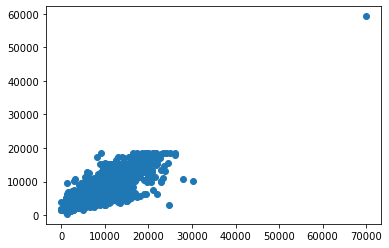

In [440]:
plt.scatter(X_df_filtered_copy.true,
           X_df_filtered_copy.preds)

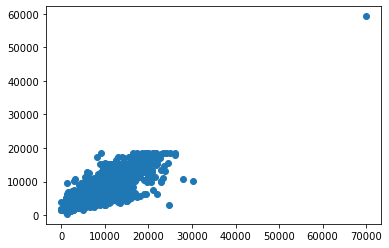

In [441]:
X_df_filtered_copy2 = X_df_filtered_copy.loc[X_df_filtered_copy.preds < 60000,:]

plt.scatter(X_df_filtered_copy2.true,
           X_df_filtered_copy2.preds)

In [442]:
np.sqrt(np.mean((X_df_filtered_copy2.true - X_df_filtered_copy2.preds)**2))


1799.3724240028212

In [443]:
X_df_filtered_copy2

,brand,model,year,km,true,preds
0,87,581,2018.0,40000.0,4990.0,5052.308918
1,31,272,2017.0,12000.0,2000.0,3816.904523
2,74,217,2017.0,19100.0,7590.0,3961.456302
3,87,609,2005.0,50000.0,4690.0,3574.146581
4,14,239,2021.0,9000.0,12490.0,11981.854286
...,...,...,...,...,...,...
10158,60,575,2011.0,20000.0,1790.0,2770.942224
10159,87,581,2018.0,20000.0,3990.0,5052.308918
10160,87,123,2004.0,40000.0,3390.0,2552.356961
10161,36,562,1991.0,30000.0,1790.0,3335.026247


## With PCA

In [136]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(X_train)

PCA(n_components=2)

In [151]:
fitted_X = pca.fit_transform(X_train).T

In [152]:
new_pd = pd.DataFrame({'PC1':np.array(fitted_X)[0], 'PC2':(-1*np.array(fitted_X)[1])})

In [154]:
reg = GradientBoostingRegressor(random_state = 2, max_depth = 100)
reg.fit(new_pd, y_train.values)

GradientBoostingRegressor(max_depth=100, random_state=2)

In [142]:
#reg = GradientBoostingRegressor(random_state = 2, max_depth = 100)
#reg.fit(fitted_X, y_train.values)

GradientBoostingRegressor(max_depth=100, random_state=2)

In [160]:
preds = reg.predict(new_pd)

In [161]:
mean_squared_error(y_train, preds)

9092330.651849397

## Visualizing the data

In [162]:
from plotnine import ggplot

/tmp/ipykernel_3252/1995244697.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


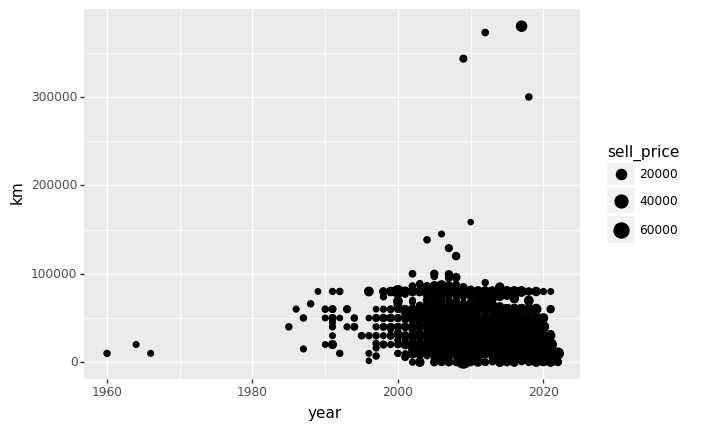

<ggplot: (8792349499335)>

In [209]:
from plotnine import geom_point, aes
df_filtered2 = df_filtered.loc[df_filtered.sell_price < 400000,:]
df_filtered2["purchase_price"] = df_filtered2.purchase_price.apply(lambda x: make_float(x)) 

(ggplot(df_filtered2, aes("year", "km")) +
 geom_point(aes(size = "sell_price")))
